In [1]:
%run ../input/python-recipes/dhtml.py
%run ../input/python-recipes/embedding_html_string.py
dhtml('Mapping')

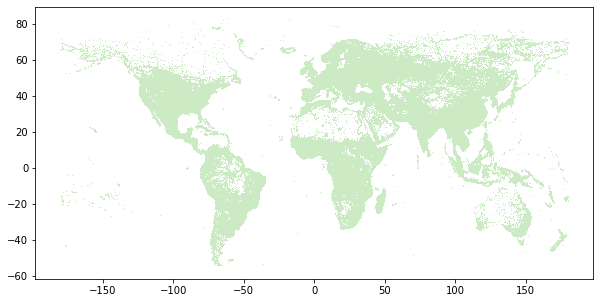

In [2]:
import pandas as pd,pylab as pl

file_path='../input/geodata-for-exercises/'
file_name='worldcitiespop.txt'
data=pd.read_csv(file_path+file_name,
                 encoding='latin-1',
                 low_memory=False)
fig=pl.figure(figsize=(10,5))
ax=fig.add_subplot('111')
pl.plot(data.Longitude,data.Latitude,',',
        c=pl.cm.Pastel1_r(.7));

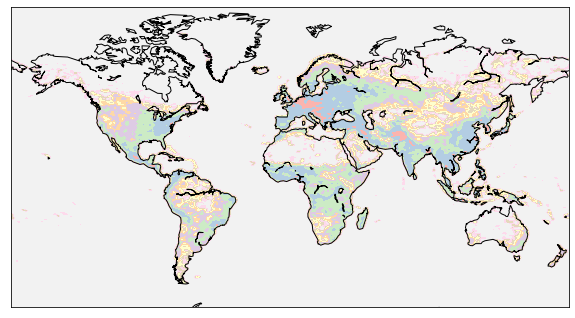

In [3]:
from mpl_toolkits.basemap import Basemap
import scipy.ndimage.filters,numpy as np

locations=data[['Longitude','Latitude']].values
m=Basemap(projection='mill',
          llcrnrlat=-65,urcrnrlat=85,
          llcrnrlon=-180,urcrnrlon=180)
x0,y0=m(-180,-65); x1,y1=m(180,85)
x,y=m(locations[:,0],locations[:,1])
population=data.Population
weights=population.copy()
weights[np.isnan(weights)]=1000
h, _, _=np.histogram2d(
    x,y,bins=(np.linspace(x0,x1,500),
              np.linspace(y0,y1,500)),
    weights=weights)
h[h==0]=1
z=scipy.ndimage.filters\
.gaussian_filter(np.log(h.T),1)

fig=pl.figure(figsize=(10,6))
m.drawcoastlines()
m.imshow(z,origin='lower',
         extent=[x0,x1,y0,y1],
         cmap=pl.get_cmap('Pastel1_r'));

In [4]:
dhtml('D3 Mapping')

In [5]:
%%writefile world_map.html
<style>
.land {fill:#3636ff; stroke:silver;}
.countries {fill:none; stroke:silver;}
</style>
<script src='https://d3js.org/d3.v3.min.js'></script>
<script src='https://d3js.org/topojson.v0.min.js'></script>
<svg id='svg006' style='background-color:cornflowerblue;'></svg>
<script type='text/javascript'>
var m=2,margin={top:m,right:m,bottom:m,left:m},
    width=document.documentElement.clientWidth-20,
    height=document.documentElement.clientHeight-20,
    tr='translate('+margin.left+','+margin.top+')';
var projection=d3.geo.equirectangular()
                 .translate([width/2,height/2]).scale(width/6);
var svg=d3.select('#svg006')
          .attr('width',width+margin.left+margin.right)
          .attr('height',height+margin.top+margin.bottom)
          .attr('transform',tr);       
var g=svg.append('g');
var path=d3.geo.path().projection(projection);
var url='https://raw.githubusercontent.com/n1n9-jp/CSIS_map_140514/master/data/'
d3.json(url.concat('world-50m.json'),
        function(world) {
            g.attr('class','land').selectAll('land')
             .data([topojson.object(world,world.objects.land)])
             .enter().append('path').attr('d',path);
            svg.attr('class','countries').selectAll('countries')
               .data([topojson.object(world,world.objects.countries)])
               .enter().append('path').attr('d',path);});
</script>

Writing world_map.html


In [6]:
file='world_map.html'
with open(file,'r') as f:
    html_str=f.read()
    f.close()
embedding_html_string(html_str,530,350,1)

In [7]:
dhtml('Highcharts Mapping')

In [8]:
%%writefile highcharts_euromap.html
<script src='https://code.highcharts.com/maps/highmaps.js'></script>
<script src='https://code.highcharts.com/modules/exporting.js'>></script>
<script src='https://code.highcharts.com/modules/offline-exporting.js'></script>
<script src='https://code.highcharts.com/mapdata/custom/europe.js'></script>
<div id='div005' style='width:99%; height:99%;'></div>
<script>
var s1='Variants for Highlighting:<br>AL,AD,AM,AT,BY,',
    s2='BE,BA,BG,CH,CY,CZ,DE,DK,EE,ES,FO,FI,FR,GB,GE,GI,GR,',
    s3='<br>HU,HR,IE,IS,IT,LT,LU,LV,MC,MK,MT,NO,NL,PL,',
    s4='PT,RO,RU,SE,SI,SK,SM,TR,UA,VA'; 
var s=s1.concat(s2).concat(s3).concat(s4);
Highcharts.mapChart('div005', {
    chart:{map:'custom/europe',borderWidth:1,backgroundColor:'slategray'},
    title:{style:{'color':'#fff','fontSize':'18px'},
           text:'Exploration of Mapping Parameters'},
    subtitle:{style:{'color':'#fff','fontSize':'12px'},text:s},
              legend:{enabled:false},
    series:[{name:'Country',color:'#1636ff',
             borderColor:'steelblue',borderWidth:1.5,
             data:[['fr',1],['gb',1],['es',1],['de',1],
                   ['it',1],['pl',1],['by',1]],
             dataLabels:{enabled:true,color:'#fff',
                         formatter:function (){if (this.point.value){
                            return this.point.name;}}},
             tooltip:{headerFormat:'',pointFormat:'{point.name}'}}] });
</script>

Writing highcharts_euromap.html


In [9]:
file='highcharts_euromap.html'
with open(file,'r') as f:
    html_str=f.read()
    f.close()
embedding_html_string(html_str,530,530,2)